<a href="https://colab.research.google.com/github/effieklestz/Chesapeake/blob/main/Chesapeak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files

uploaded = files.upload()

Saving JCOBYDIVISION (1).csv to JCOBYDIVISION (1).csv


In [13]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime


In [14]:

# Assuming your CSV file is named 'example.csv'
df = pd.read_csv('JCOBYDIVISION (1).csv')

In [15]:
def convertDatatypes(df):
    column_names = df.columns.to_numpy()
    column_types = df.dtypes
    filtered_column_names = [col for col in column_names if column_types[col] != float]
    filtered_column_names = [col for col in filtered_column_names if col != 'Months in Transaction Date']
    for col in filtered_column_names:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].str.replace('/', '')
        df[col] = df[col].astype(float)
        df[col].fillna(0, inplace=True)
    return df
df = convertDatatypes(df)

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [16]:
#Remove 2024 Data and add index as column
df = df[df['Months in Transaction Date'] != '01/2024']
df['index_as_column'] = df.index




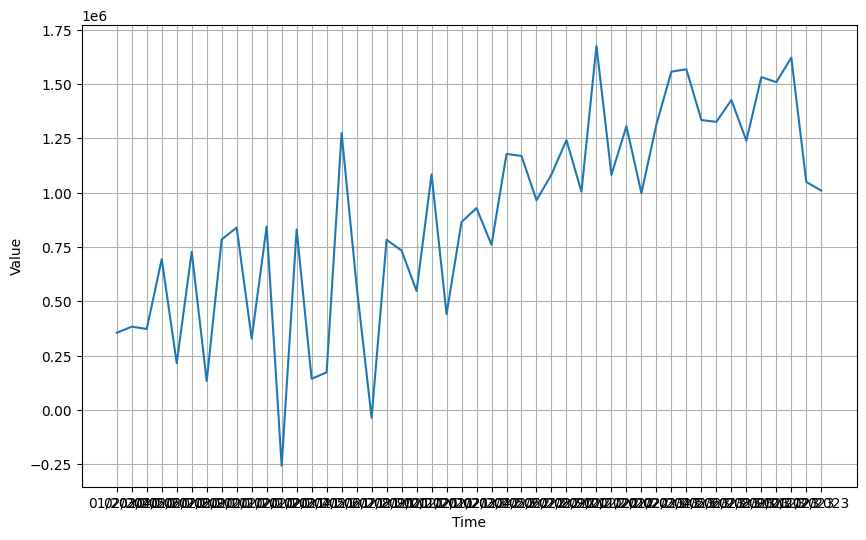

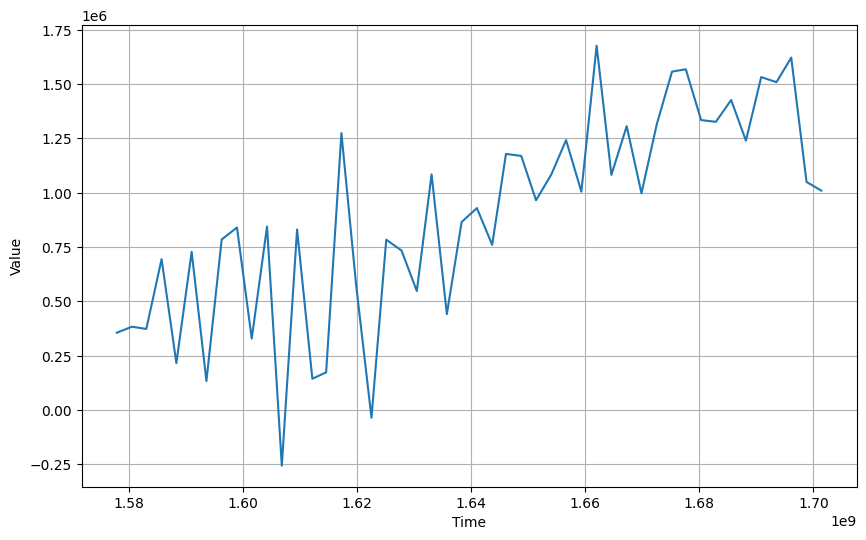

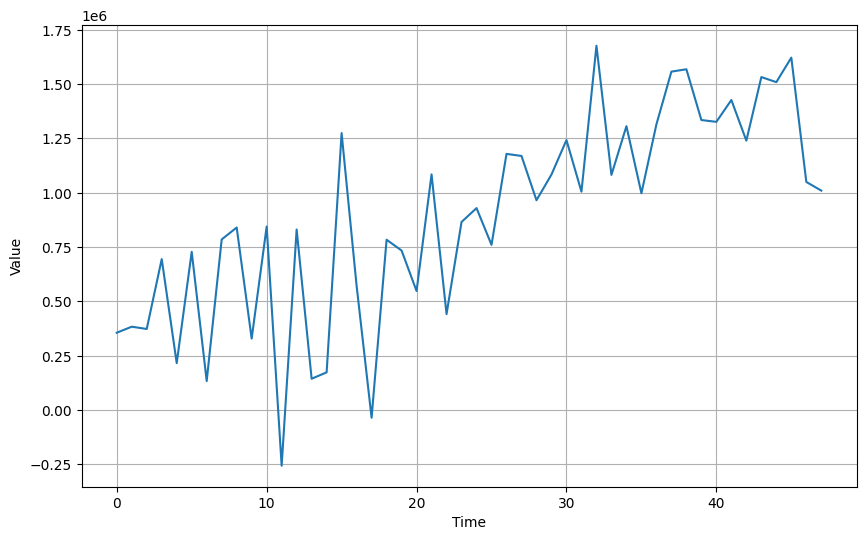

In [59]:

plot_series(df['Months in Transaction Date'],df['GP'])

plot_series(df['index_as_column'],df['GP'])

In [60]:
# Define the split time
split_time = 35
time = df['DateColumnInSeconds']
series = df['GP']
# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [61]:
# Define the split time
split_time = 35
uni_list = ['index_as_column','GP']

time = df['index_as_column']
series = df['GP']
df_uni = df[uni_list]

# time = df['DateColumnInSeconds']
# series = df['GP']

# Create a Boolean
train_mask = df_uni['index_as_column']< split_time
valid_mask = ~train_mask



# Get the train set
time_train = df_uni.loc[train_mask,'index_as_column']
x_train = df_uni.loc[train_mask,'GP']
# Get the validation set
time_valid = df_uni.loc[valid_mask, 'index_as_column']
x_valid = df_uni.loc[valid_mask,'GP']

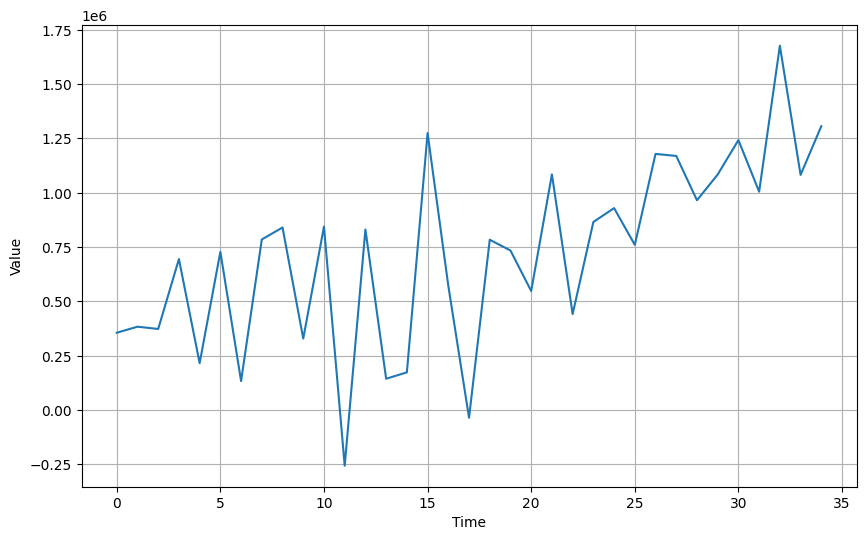

In [62]:
plot_series(time_train, x_train)

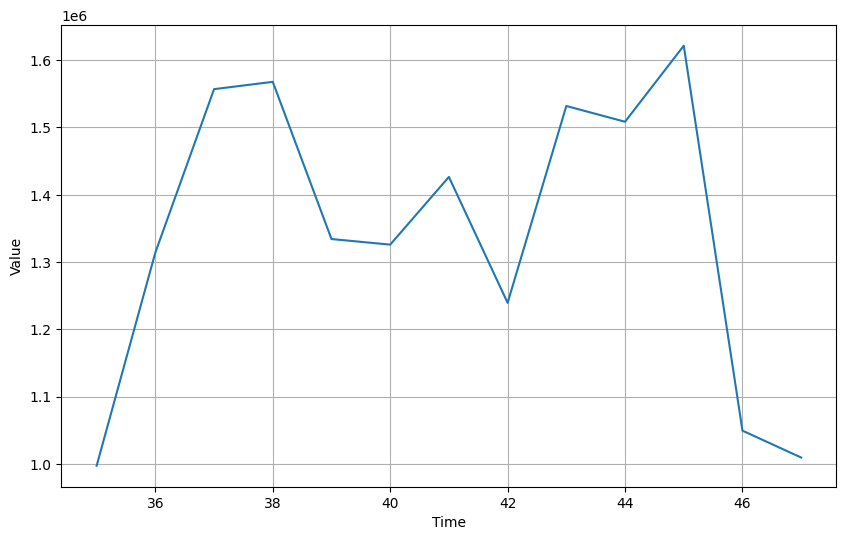

In [63]:
# Plot the validation set
plot_series(time_valid, x_valid)

In [64]:
# Generate the naive forecast
naive_forecast = series[(split_time -1):-1]

# Define time step
time_step = 41

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step+1]}')

ground truth at time step 41: 1426435.8899999862
prediction at time step 42: 1239272.6099999947


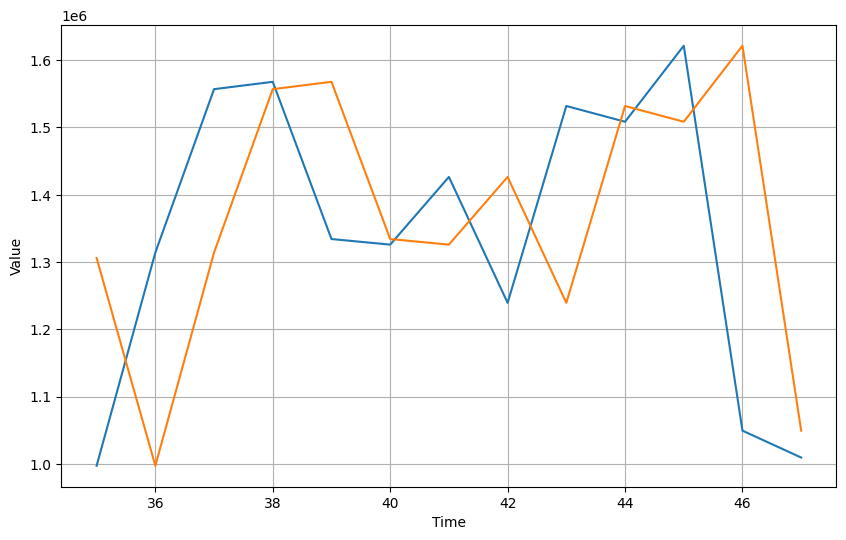

In [65]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

In [66]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

60196698965.36993
188483.5823076921


In [67]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

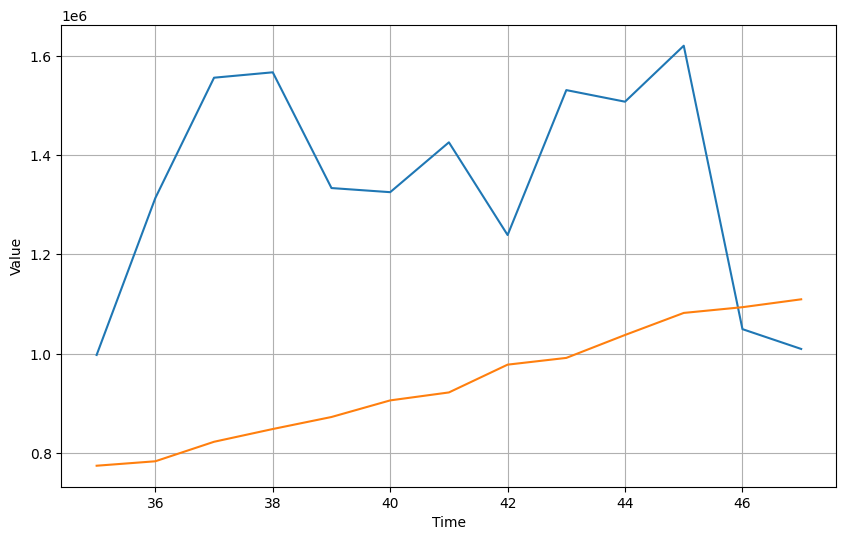

In [68]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [69]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

224783106447.0959
427306.6762307676
